## Algoritmos de segmentação
Mudanças bruscas nos níveis de cinza (Descontinuidades):
- Pontos isolados
- Linhas
- Bordas na imagem

Similaridades:
- Limiarização (binarização)
- Crescimento de regiões
- Divisão e fusão de regiões


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import skimage

# Dúvida: Arquivo 1.txt contém os locais das assinaturas?

# Conceitos vistos em sala:
# 1- Operações pontuais
# 2- Equalização histogrâmica
# 3- Filtros: gaussiano, média, mediana
# 4- Operações morfológicas <<
# 5- Transformada de Hough <<
# 6- Transformações geométricas (zoom/interpolação)

## Imagem 4 da base de dados

248 0 (4000, 3000)


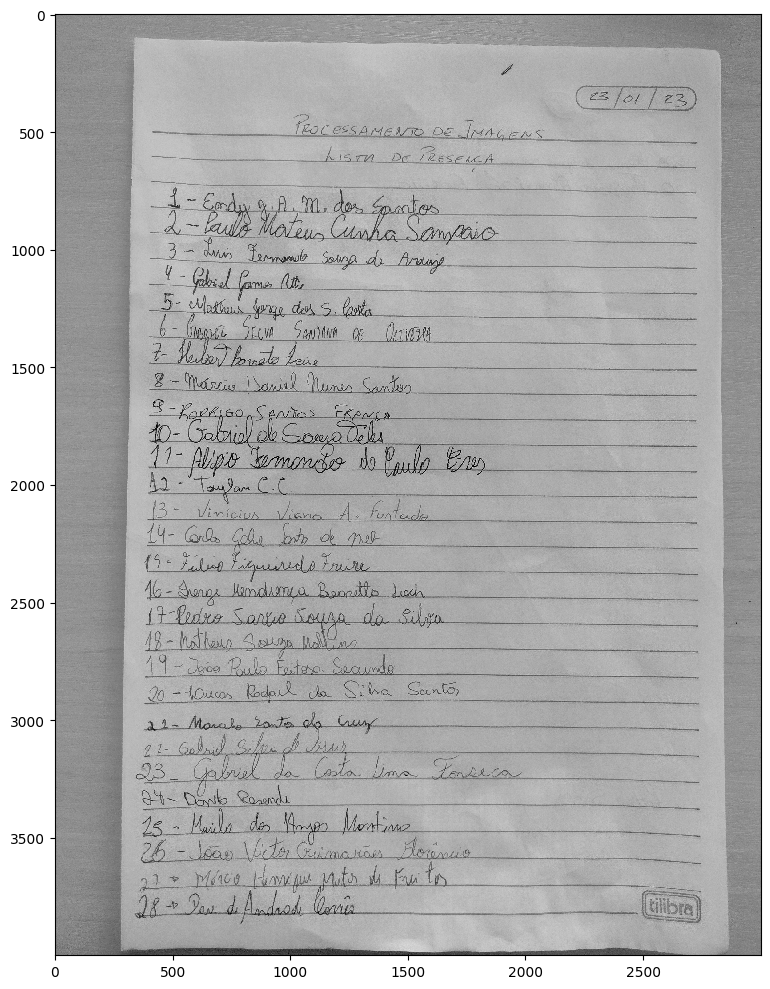

In [2]:
img = (io.imread("base-de-dados/4.jpg",as_gray=True)*255).astype("uint8")
altura,largura = img.shape
print(img.max(), img.min(), img.shape)
plt.figure(figsize=(10,10))
io.imshow(img)

## Ler arquivo com locais das assinaturas

In [3]:
arq = open("base-de-dados/4.txt", "r")
conteudo = arq.read()
conteudo

'0 0.378405 0.201292 0.345396 0.031519\n0 0.424330 0.226006 0.429593 0.023639\n0 0.379362 0.252869 0.358791 0.037250\n0 0.275552 0.282239 0.174133 0.032952\n0 0.322912 0.306237 0.265027 0.035101\n0 0.365010 0.334532 0.362618 0.032952\n0 0.275552 0.359246 0.212404 0.039399\n0 0.347788 0.387183 0.332001 0.045130\n0 0.322434 0.423717 0.315736 0.023639\n0 0.327696 0.443416 0.291817 0.032952\n0 0.406152 0.474219 0.421938 0.040115\n0 0.271246 0.502156 0.146387 0.031519\n0 0.365489 0.526870 0.342526 0.029370\n0 0.321477 0.553375 0.290860 0.032235\n0 0.314779 0.578089 0.290860 0.034384\n0 0.350658 0.611399 0.360705 0.030803\n0 0.361661 0.636829 0.382710 0.035817\n0 0.302341 0.664050 0.260243 0.030086\n0 0.337264 0.687331 0.310952 0.032235\n0 0.376013 0.717776 0.398019 0.031519\n0 0.319563 0.751085 0.275552 0.029370\n0 0.299471 0.772934 0.260243 0.030086\n0 0.433420 0.805169 0.478388 0.031519\n0 0.257851 0.832032 0.157868 0.023639\n0 0.351137 0.857821 0.323390 0.030803\n0 0.390843 0.887191 0.40

In [4]:
linhas = conteudo.split("\n")
linhas

['0 0.378405 0.201292 0.345396 0.031519',
 '0 0.424330 0.226006 0.429593 0.023639',
 '0 0.379362 0.252869 0.358791 0.037250',
 '0 0.275552 0.282239 0.174133 0.032952',
 '0 0.322912 0.306237 0.265027 0.035101',
 '0 0.365010 0.334532 0.362618 0.032952',
 '0 0.275552 0.359246 0.212404 0.039399',
 '0 0.347788 0.387183 0.332001 0.045130',
 '0 0.322434 0.423717 0.315736 0.023639',
 '0 0.327696 0.443416 0.291817 0.032952',
 '0 0.406152 0.474219 0.421938 0.040115',
 '0 0.271246 0.502156 0.146387 0.031519',
 '0 0.365489 0.526870 0.342526 0.029370',
 '0 0.321477 0.553375 0.290860 0.032235',
 '0 0.314779 0.578089 0.290860 0.034384',
 '0 0.350658 0.611399 0.360705 0.030803',
 '0 0.361661 0.636829 0.382710 0.035817',
 '0 0.302341 0.664050 0.260243 0.030086',
 '0 0.337264 0.687331 0.310952 0.032235',
 '0 0.376013 0.717776 0.398019 0.031519',
 '0 0.319563 0.751085 0.275552 0.029370',
 '0 0.299471 0.772934 0.260243 0.030086',
 '0 0.433420 0.805169 0.478388 0.031519',
 '0 0.257851 0.832032 0.157868 0.0

In [5]:
locais_assinaturas = []
for i in range(len(linhas)):
    n = linhas[i].split(" ")
    n = np.array(n).astype(float)
    locais_assinaturas.append(n)

locais_assinaturas

[array([0.      , 0.378405, 0.201292, 0.345396, 0.031519]),
 array([0.      , 0.42433 , 0.226006, 0.429593, 0.023639]),
 array([0.      , 0.379362, 0.252869, 0.358791, 0.03725 ]),
 array([0.      , 0.275552, 0.282239, 0.174133, 0.032952]),
 array([0.      , 0.322912, 0.306237, 0.265027, 0.035101]),
 array([0.      , 0.36501 , 0.334532, 0.362618, 0.032952]),
 array([0.      , 0.275552, 0.359246, 0.212404, 0.039399]),
 array([0.      , 0.347788, 0.387183, 0.332001, 0.04513 ]),
 array([0.      , 0.322434, 0.423717, 0.315736, 0.023639]),
 array([0.      , 0.327696, 0.443416, 0.291817, 0.032952]),
 array([0.      , 0.406152, 0.474219, 0.421938, 0.040115]),
 array([0.      , 0.271246, 0.502156, 0.146387, 0.031519]),
 array([0.      , 0.365489, 0.52687 , 0.342526, 0.02937 ]),
 array([0.      , 0.321477, 0.553375, 0.29086 , 0.032235]),
 array([0.      , 0.314779, 0.578089, 0.29086 , 0.034384]),
 array([0.      , 0.350658, 0.611399, 0.360705, 0.030803]),
 array([0.      , 0.361661, 0.636829, 0.

### Desenhar os retângulos das assinaturas

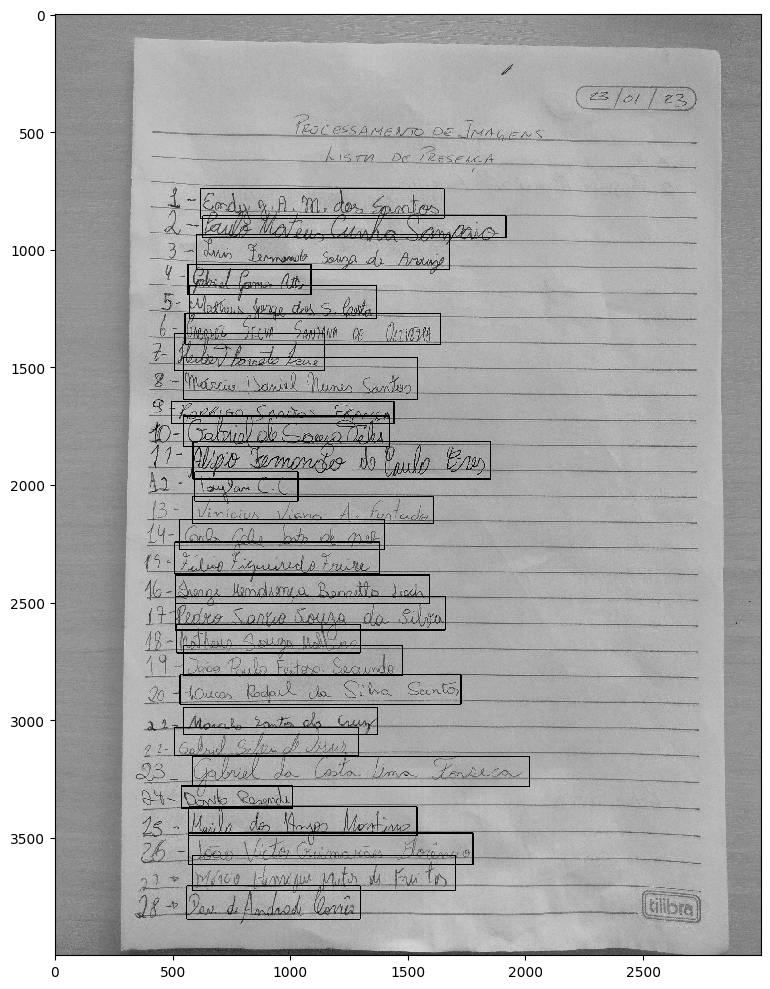

In [6]:
# https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

plt.figure(figsize=(10,10))

# Usar os valores da imagem.txt para desenhar o quadrado
# target(tipo de alvo-assinatura) pontocentralX pontocentralY(coordenadas) larguraDaAssinatura alturaDaAssinatura
alturaImg, larguraImg = img.shape
for local in locais_assinaturas:

    colunaCentro = int(local[1] * larguraImg)
    linhaCentro = int(local[2] * alturaImg)
    centro = (linhaCentro, colunaCentro)
    #print(centro)

    offsetColuna = int(local[3] * larguraImg / 2)
    offsetLinha = int(local[4] * alturaImg / 2)
    #print(offsetLinha, offsetColuna)

    coluna_top = (colunaCentro - offsetColuna)
    linha_top = (linhaCentro - offsetLinha )
    top_left = (coluna_top, linha_top)
    #print(top_left)

    coluna_bot = (colunaCentro + offsetColuna)
    linha_bot = (linhaCentro + offsetLinha)
    bot_right = (coluna_bot, linha_bot)
    #print(bot_right)
    #print("\n")
    
    cv2.rectangle(img, top_left, bot_right, color=(0,0,255), thickness=4) # coordenadas: (coluna,linha)

io.imshow(img)
img = (io.imread("base-de-dados/4.jpg",as_gray=True)*255).astype("uint8")

## Histograma
Provavelmente não vai ajudar muito no processamento, mas pode ser usado para encontrar um limite para a limiarização

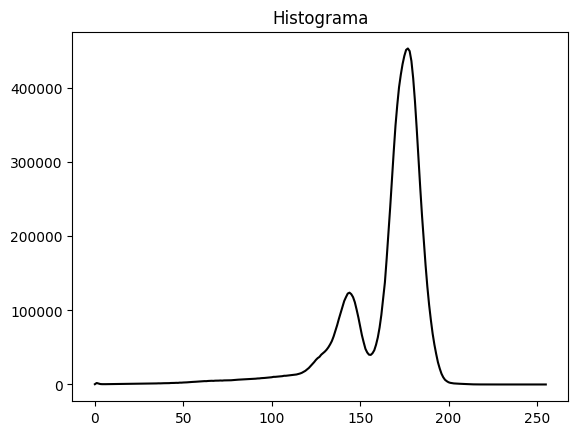

In [7]:
h = np.histogram(img,bins=256,range=(0,255))[0]
plt.plot (h,'-k')
plt.title("Histograma")
plt.show()

## Limiarização da imagem (binarização)

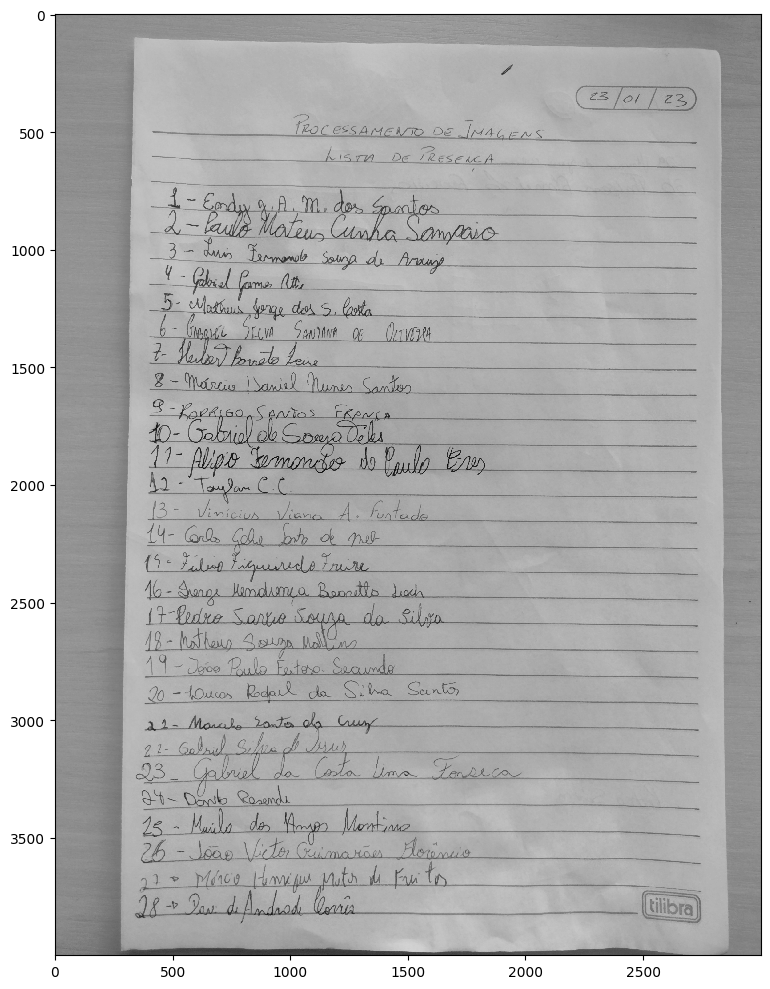

In [8]:
# Aplicar um filtro para suavizar as diferenças de luminosidade das imagens
#img = (io.imread("base-de-dados/4-2.jpg",as_gray=True)*255).astype("uint8")

img_blur = cv2.medianBlur(img,5)
#img_blur = cv2.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(10,10))
io.imshow(img_blur)

# img_median2 = skimage.filters.median(img)
# plt.figure(figsize=(10,10))
# io.imshow(img_median2)

In [9]:
# Usar função para descobrir o melhor limiar
# Sobre otsu_optimization: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
from skimage.filters import threshold_otsu
limiar = threshold_otsu(img_blur)
print(limiar)

# plt.figure(figsize=(8,8))
# #img_binaria = img.copy()
# img_binaria = img_blur.copy()
# img_binaria[img_binaria>=limiar] = 255 # Background
# img_binaria[img_binaria<limiar] = 0
# io.imshow(img_binaria)

153


153.0


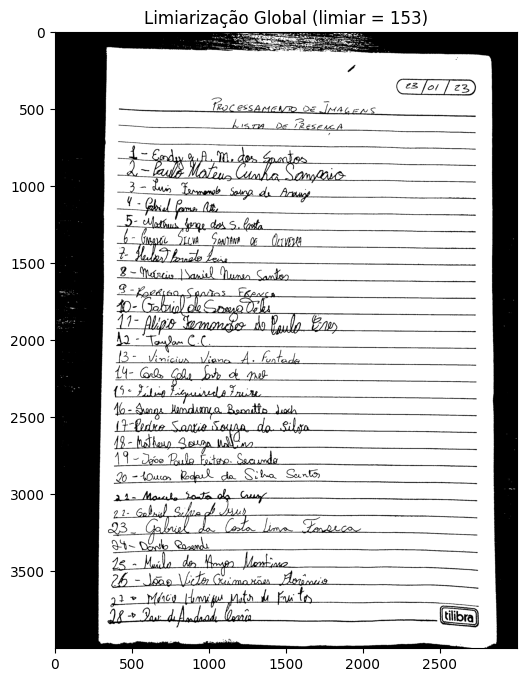

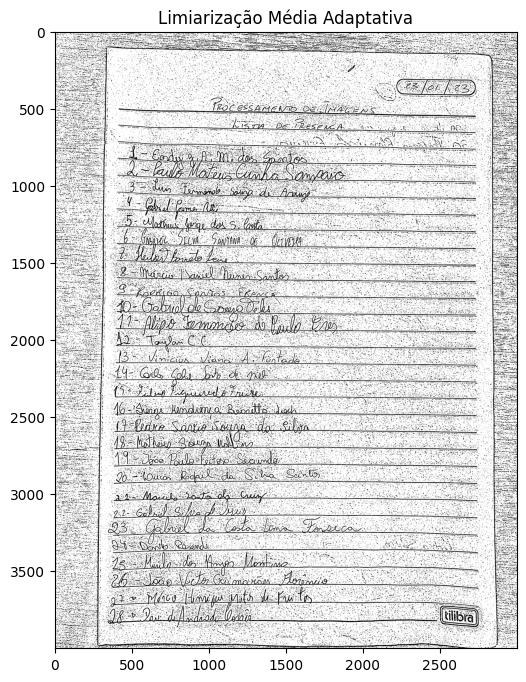

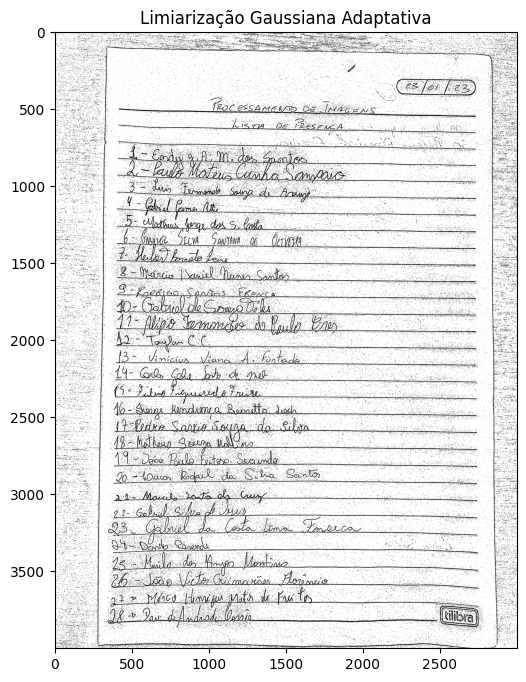

In [18]:
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
img_blur = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img_blur,limiar,255,cv2.THRESH_BINARY)
print(ret)
th2 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

img_binaria = th3 # <<< Imagem binária considerada usará o método da limiarização gaussiana
img_binaria = img_binaria / 255

plt.figure(figsize=(8,8))
plt.imshow(th1,cmap='gray',vmin=0,vmax=255)
plt.title(f'Limiarização Global (limiar = {limiar})')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(th2,cmap='gray',vmin=0,vmax=255)
plt.title('Limiarização Média Adaptativa')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(th3,cmap='gray',vmin=0,vmax=255)
plt.title('Limiarização Gaussiana Adaptativa')
plt.show()

## Buscar as _bounding boxes_ das assinaturas

_The bounding box is an imaginary rectangular box that contains an object or a set of points. When used in digital image processing, the bounding box refers to the border’s coordinates that enclose an image. They are often used to bind or identify a target and serve as a reference point for object detection and create a collision box for that object_

### Perfil vertical e horizontal

Depois de binarizar, faz-se o somatório dos pixels e usa-o pra ver se aquela linha/coluna contém uma assinatura ou se é background

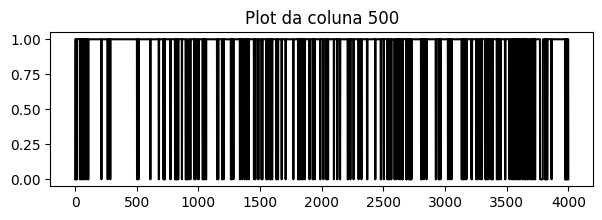

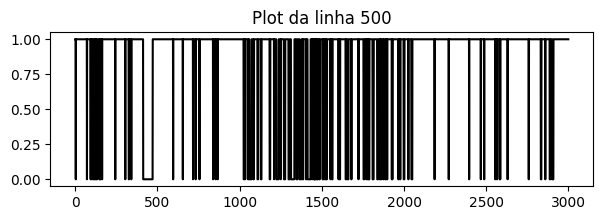

(1.0, 0.0, (4000, 3000))

In [62]:
plt.figure(figsize=(7,2))
plt.plot(img_binaria[:,500],"-k")
plt.title('Plot da coluna 500')
plt.show()

plt.figure(figsize=(7,2))
plt.plot(img_binaria[500,:],"-k")
plt.title('Plot da linha 500')
plt.show()

img_binaria.max(), img_binaria.min(), img_binaria.shape

In [153]:
soma_linhas = np.sum(img_binaria, axis=1) # Perfil horizontal
print(soma_linhas)
print(soma_linhas.max(), soma_linhas.min())
# Valores altos: background (fundo claro)
# Valores baixos: talvez tenha uma assinatura

[2633. 2691. 2773. ... 2661. 2604. 2502.]
2950.0 1266.0


In [189]:
inicios = []
fins = []
cont_assinaturas = 0

# Limite min e max para o somatório dos pixels da linha. >> Descobrir esses limites é a questão principal <<
# Não consegui pensar em um jeito para determiná-los para cada imagem a não ser intuitivamente
lmin_h = 2000
lmax_h = 2600

PA = (soma_linhas<lmax_h) & (soma_linhas>lmin_h) # PA é uma matriz booleana que diz se a linha possivelmente contem assinatura

i = 5
while (i+5 < alturaImg):
    # Considerar 11 linhas seguidas para ignorar ruidos
    # Avançar até encontrar um elemento que pode ser uma assinatura
    while (
        i+5 < alturaImg and not (
            PA[i-5] and PA[i-4] and PA[i-3] and PA[i-2] and PA[i-1] and \
            PA[i] and PA[i+1] and PA[i+2] and PA[i+3] and PA[i+4] and PA[i+5]
        )
    ):
        i+=1

    # Encontrou um elemento
    inicios.append(i-5)

    # Avançar até encontrar o fim da assinatura
    i+=10
    while (
        i+5 < alturaImg and PA[i-5] and PA[i-4] and PA[i-3] and PA[i-2] and PA[i-1] and \
        PA[i] and PA[i+1] and PA[i+2] and PA[i+3] and PA[i+4] and PA[i+5]
    ):
        i+=1
    fins.append(i+5)
    cont_assinaturas += 1
    print(f"Assinatura começando na linha {inicios[cont_assinaturas-1]} e terminando na linha {fins[cont_assinaturas-1]}")

print("Qtd assinaturas:",cont_assinaturas)

Assinatura começando na linha 94 e terminando na linha 126
Assinatura começando na linha 505 e terminando na linha 527
Assinatura começando na linha 618 e terminando na linha 638
Assinatura começando na linha 734 e terminando na linha 754
Assinatura começando na linha 827 e terminando na linha 847
Assinatura começando na linha 843 e terminando na linha 863
Assinatura começando na linha 912 e terminando na linha 966
Assinatura começando na linha 1069 e terminando na linha 1089
Assinatura começando na linha 1176 e terminando na linha 1196
Assinatura começando na linha 1273 e terminando na linha 1293
Assinatura começando na linha 1285 e terminando na linha 1305
Assinatura começando na linha 1387 e terminando na linha 1407
Assinatura começando na linha 1493 e terminando na linha 1515
Assinatura começando na linha 1595 e terminando na linha 1623
Assinatura começando na linha 1705 e terminando na linha 1731
Assinatura começando na linha 1812 e terminando na linha 1839
Assinatura começando na

In [194]:
# Determinar inicio (esq) e fim (dir) da assinatura pelo perfil vertical
inicios_col = []
fins_col = []
cont_col = 0

# Calcular estatisticas das alturas das assinaturas e usar para determinar os limites de 
# quantidade de pixels 0 e 1 na busca pelas colunas inicias e finais das assinaturas
alturas_assinaturas = []
for i in range(cont_assinaturas):
    alturas_assinaturas.append(fins[i] - inicios[i])

somatorio = np.sum(alturas_assinaturas)
media = somatorio / cont_assinaturas
desvio = np.std(alturas_assinaturas)

lmin_v = int(media - (desvio))
lmax_v = int(media + (desvio))
print("Limite min:",lmin_v, "-- Limite max:", lmax_v)

# Para cada assinatura encontrada...
for j in range(cont_assinaturas):
    # Perfil vertical (considerar apenas as linhas de cada assinatura)
    soma_colunas = np.sum(img_binaria[inicios[j]:fins[j],:], axis=0)
    # print(soma_colunas)
    # print(soma_colunas.min(), soma_colunas.max())
    PA_c = (soma_colunas<lmax_v) & (soma_colunas>lmin_v)

    # Novamente, considerar 11 linhas seguidas para ignorar ruídos da imagem
    # Avançar até encontrar o inicio da assinatura
    i = 5
    while (
        i+5 < larguraImg and not (
            PA_c[i-5] and PA_c[i-4] and PA_c[i-3] and PA_c[i-2] and PA_c[i-1] and PA_c[i] \
            and PA_c[i+1] and PA_c[i+2] and PA_c[i+3] and PA_c[i+4] and PA_c[i+5]
        )
    ):
        i+=1
    # Encontrou o inicio
    inicios_col.append(i-5)

    # Avançar até encontrar o fim da assinatura
    i+=10
    while i+5 < larguraImg and (
        PA_c[i-5] and PA_c[i-4] and PA_c[i-3] and PA_c[i-2] and PA_c[i-1] and PA_c[i] \
        and PA_c[i+1] and PA_c[i+2] and PA_c[i+3] and PA_c[i+4] and PA_c[i+5]
    ):
        i+=1
    fins_col.append(i+5)
    cont_col += 1
    print(f"Assinatura começando na coluna {inicios_col[cont_col-1]} e terminando na coluna {fins_col[cont_col-1]}")

print("Qtd encontradas:", cont_col)

Limite min: 16 -- Limite max: 29
Assinatura começando na coluna 165 e terminando na coluna 185
Assinatura começando na coluna 0 e terminando na coluna 115
Assinatura começando na coluna 0 e terminando na coluna 43
Assinatura começando na coluna 0 e terminando na coluna 20
Assinatura começando na coluna 6 e terminando na coluna 26
Assinatura começando na coluna 6 e terminando na coluna 26
Assinatura começando na coluna 2990 e terminando na coluna 3010
Assinatura começando na coluna 0 e terminando na coluna 57
Assinatura começando na coluna 0 e terminando na coluna 87
Assinatura começando na coluna 62 e terminando na coluna 82
Assinatura começando na coluna 35 e terminando na coluna 55
Assinatura começando na coluna 0 e terminando na coluna 41
Assinatura começando na coluna 0 e terminando na coluna 131
Assinatura começando na coluna 0 e terminando na coluna 312
Assinatura começando na coluna 0 e terminando na coluna 310
Assinatura começando na coluna 0 e terminando na coluna 306
Assinatu

## Desenhar as _Bounding Boxes_ encontradas

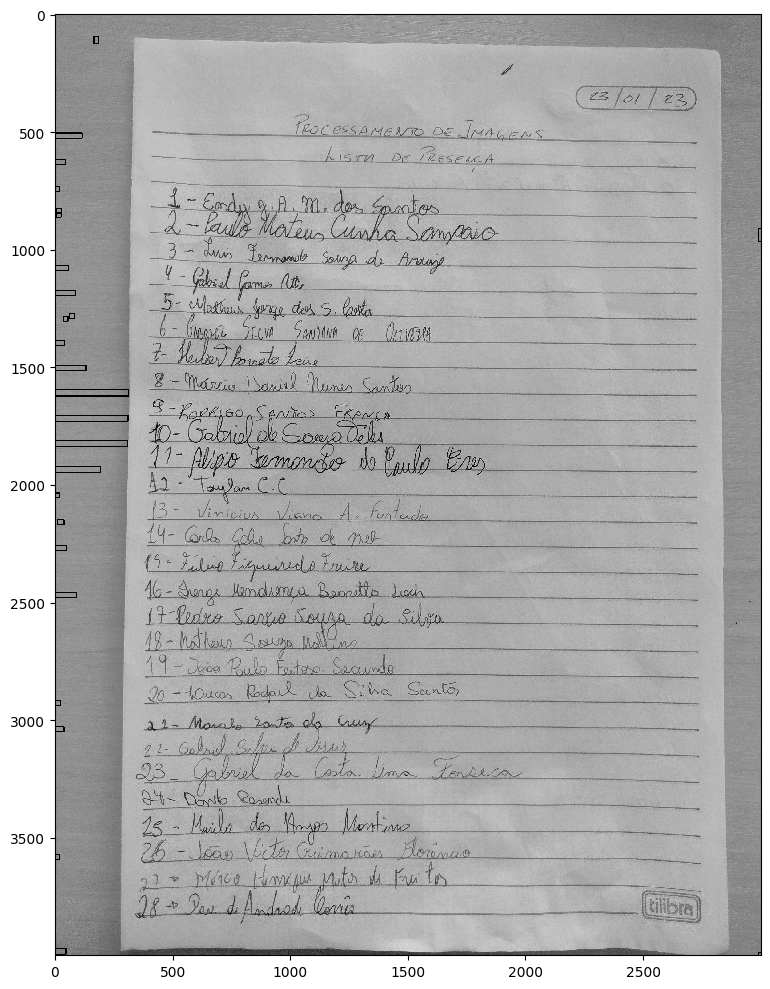

In [195]:
# Desenhar os retângulos
# https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

plt.figure(figsize=(10,10))
bounding_boxes = []
for l1,c1,l2,c2 in zip(inicios,inicios_col,fins,fins_col):
    bounding_boxes.append([l1,l2,c1,c2])
    top_left = (c1, l1)
    bot_right = (c2, l2)
    cv2.rectangle(img, top_left, bot_right, color=(0,0,255), thickness=4) # coordenadas: (coluna,linha)

io.imshow(img)
img = (io.imread("base-de-dados/4.jpg",as_gray=True)*255).astype("uint8")

## Calcular acurácia das caixas encontradas
- Usar interseção sobre união para descobrir a acurácia das boxes encontradas (Intersection over Union (IoU))

In [201]:
locais_assinaturas

[array([0.      , 0.378405, 0.201292, 0.345396, 0.031519]),
 array([0.      , 0.42433 , 0.226006, 0.429593, 0.023639]),
 array([0.      , 0.379362, 0.252869, 0.358791, 0.03725 ]),
 array([0.      , 0.275552, 0.282239, 0.174133, 0.032952]),
 array([0.      , 0.322912, 0.306237, 0.265027, 0.035101]),
 array([0.      , 0.36501 , 0.334532, 0.362618, 0.032952]),
 array([0.      , 0.275552, 0.359246, 0.212404, 0.039399]),
 array([0.      , 0.347788, 0.387183, 0.332001, 0.04513 ]),
 array([0.      , 0.322434, 0.423717, 0.315736, 0.023639]),
 array([0.      , 0.327696, 0.443416, 0.291817, 0.032952]),
 array([0.      , 0.406152, 0.474219, 0.421938, 0.040115]),
 array([0.      , 0.271246, 0.502156, 0.146387, 0.031519]),
 array([0.      , 0.365489, 0.52687 , 0.342526, 0.02937 ]),
 array([0.      , 0.321477, 0.553375, 0.29086 , 0.032235]),
 array([0.      , 0.314779, 0.578089, 0.29086 , 0.034384]),
 array([0.      , 0.350658, 0.611399, 0.360705, 0.030803]),
 array([0.      , 0.361661, 0.636829, 0.

In [200]:
bounding_boxes

[[94, 126, 165, 185],
 [505, 527, 0, 115],
 [618, 638, 0, 43],
 [734, 754, 0, 20],
 [827, 847, 6, 26],
 [843, 863, 6, 26],
 [912, 966, 2990, 3010],
 [1069, 1089, 0, 57],
 [1176, 1196, 0, 87],
 [1273, 1293, 62, 82],
 [1285, 1305, 35, 55],
 [1387, 1407, 0, 41],
 [1493, 1515, 0, 131],
 [1595, 1623, 0, 312],
 [1705, 1731, 0, 310],
 [1812, 1839, 0, 306],
 [1924, 1947, 0, 194],
 [2036, 2056, 0, 20],
 [2150, 2170, 10, 38],
 [2260, 2280, 0, 50],
 [2460, 2480, 0, 92],
 [2919, 2939, 2, 22],
 [3029, 3049, 0, 38],
 [3574, 3594, 0, 20],
 [3971, 3996, 0, 46],
 [3990, 4010, 2990, 3010]]